<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/13_Capstone/ObjectDetection_autogluon_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pydicom

!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd 
import numpy as np
import os
import pydicom as dicom
import cv2
import shutil

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import autogluon.core as ag
from autogluon.vision import ObjectDetector



/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [5]:
# DATA_ROOT_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/"
# META_DATA = os.path.join(DATA_ROOT_PATH,"stage_2_detailed_class_info.csv/stage_2_detailed_class_info.csv")
# TRAIN_LABEL = os.path.join(DATA_ROOT_PATH,"stage_2_train_labels.csv/stage_2_train_labels.csv")
# TRAIN_FOLDER = os.path.join(DATA_ROOT_PATH,"stage_2_train_images")
# TEST_FOLDER = os.path.join(DATA_ROOT_PATH,"stage_2_test_images")

# AUTOGLUON_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon"

# DATA_ROOT_PATH,META_DATA, TRAIN_LABEL,TRAIN_FOLDER,TEST_FOLDER

# infected_pd = train_data.query("Target == 1").sample(n=9,random_state = 32)
# # train_data.fillna(value =0,inplace = True)

# # for index, row in infected_pd.iterrows():
# #   print(row["filepath"])
# #   ds = dicom.dcmread(row["filepath"])
# #   cv2.imwrite(os.path.join(AUTOGLUON_PATH, "{}.jpg".format(row["patientId"])), ds.pixel_array)
# #   textfile = "{}.txt".format(row["patientId"])
# #   outfile = open(os.path.join(AUTOGLUON_PATH,textfile), 'w') 
# #   outfile.write("{} {} {} {} {}\n".format(row["Target"],row["x"],row["y"],row["width"],row["height"])) 
# #   outfile.close()


In [6]:
IMG_SOURCE_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/Working/images/"
LABEL_SOURCE_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Pneumonia _DS/Working/labels/"
AUTOGLUON_PATH = "/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon"

In [7]:
train_data = pd.read_csv("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/final_data.csv")
train_data.head()

,Unnamed: 0,patientId,x,y,width,height,Target,class,filepath,Train_or_Test,area,age,sex,ViewPosition,BodyPartExamined
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,51,F,PA,CHEST
1,1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,48,F,PA,CHEST
2,2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,19,M,AP,CHEST
3,3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,NaN,28,M,PA,CHEST
4,4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,/content/drive/MyDrive/GreatLearning/Captone_p...,Train,80727.0,32,F,AP,CHEST


In [8]:
# infected_pd = train_data.query("Target == 1").sample(n=300,random_state = 32)["patientId"]
# for id in list(infected_pd):
#   img_name = "{}.{}".format(id,"jpg")
#   txt_name = "{}.{}".format(id,"txt")
#   shutil.copyfile(os.path.join(IMG_SOURCE_PATH,img_name),os.path.join(AUTOGLUON_PATH,"affected",img_name))
#   shutil.copyfile(os.path.join(LABEL_SOURCE_PATH,txt_name),os.path.join(AUTOGLUON_PATH,"affected",txt_name))

In [9]:
# shutil.make_archive(os.path.join(AUTOGLUON_PATH,"affected"),"zip",os.path.join(AUTOGLUON_PATH,"affected"))

In [10]:
# shutil.unpack_archive(os.path.join(AUTOGLUON_PATH,"autogluon.zip"), AUTOGLUON_PATH)


In [11]:
# not_infected_pd = train_data.query("Target == 0").sample(n=100,random_state = 32)["patientId"]
# for id in list(infected_pd):
#   img_name = "{}.{}".format(id,"jpg")
#   txt_name = "{}.{}".format(id,"txt")
#   shutil.copyfile(os.path.join(IMG_SOURCE_PATH,img_name),os.path.join(AUTOGLUON_PATH,"not_affected",img_name))


In [12]:
dataset_train = ObjectDetector.Dataset.from_voc("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon/pheno_VOC", splits='train')
dataset_train.head()

,image,rois,image_attr
0,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.1796875, 'ymin': 0.1...","{'width': 128.0, 'height': 128.0}"
1,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.1328125, 'ymin': 0.1...","{'width': 128.0, 'height': 128.0}"
2,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.3046875, 'ymin': 0.2...","{'width': 128.0, 'height': 128.0}"
3,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.46875, 'ymin': 0.320...","{'width': 128.0, 'height': 128.0}"
4,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.5546875, 'ymin': 0.3...","{'width': 128.0, 'height': 128.0}"


In [13]:
dataset_train.shape

(170, 3)

In [14]:
dataset_test = ObjectDetector.Dataset.from_voc("/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/autogluon/pheno_VOC", splits='test')
dataset_test.head()

,image,rois,image_attr
0,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.2734375, 'ymin': 0.5...","{'width': 128.0, 'height': 128.0}"
1,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.34375, 'ymin': 0.640...","{'width': 128.0, 'height': 128.0}"
2,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.5546875, 'ymin': 0.2...","{'width': 128.0, 'height': 128.0}"
3,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.5625, 'ymin': 0.25, ...","{'width': 128.0, 'height': 128.0}"
4,/content/drive/MyDrive/GreatLearning/Captone_p...,"[{'class': '0', 'xmin': 0.1328125, 'ymin': 0.2...","{'width': 128.0, 'height': 128.0}"


In [17]:
dataset_test.shape

(20, 3)

The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Randomly split train_data into train[152]/validation[18] splits.
Starting HPO experiments


  0%|          | 0/2 [00:00<?, ?it/s]

modified configs(<old> != <new>): {
root.valid.batch_size 16 != 4
root.dataset         voc_tiny != auto
root.ssd.data_shape  300 != 512
root.ssd.base_network vgg16_atrous != resnet50_v1
root.gpus            (0, 1, 2, 3) != (0,)
root.dataset_root    ~/.mxnet/datasets/ != auto
root.train.batch_size 16 != 4
root.train.early_stop_max_value 1.0 != inf
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 2
root.train.seed      233 != 242
}
Saved config to /content/bcf7c8c5/.trial_0/config.yaml
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Model file not found. Downloading.



 95%|█████████▍| 171527/181188 [00:03<00:00, 53891.79KB/s]
181189KB [00:03, 50139.19KB/s]                            
Start training from [Epoch 0]
[Epoch 0] Training cost: 138.250195, CrossEntropy=3.278593, SmoothL1=2.591562
[Epoch 0] Validation: 
0=0.04249360864104172
mAP=0.04249360864104172
[Epoch 0] Current best map: 0.042494 vs previous 0.000000, saved to /content/bcf7c8c5/.trial_0/best_checkpoint.pkl
[Epoch 1] Training cost: 135.005616, CrossEntropy=2.891275, SmoothL1=2.500081
[Epoch 1] Validation: 
0=0.02383589219032257
mAP=0.02383589219032257
[Epoch 2] Training cost: 133.681745, CrossEntropy=2.594358, SmoothL1=2.433539
[Epoch 2] Validation: 
0=0.28879771915336416
mAP=0.28879771915336416
[Epoch 2] Current best map: 0.288798 vs previous 0.042494, saved to /content/bcf7c8c5/.trial_0/best_checkpoint.pkl
[Epoch 3] Training cost: 133.393465, CrossEntropy=2.517906, SmoothL1=2.184535
[Epoch 3] Validation: 
0=0.2888017233009706
mAP=0.2888017233009706
[Epoch 3] Current best map: 0.28880


100%|██████████| 57421/57421 [00:01<00:00, 53012.80KB/s]
modified configs(<old> != <new>): {
root.valid.batch_size 16 != 4
root.dataset         voc_tiny != auto
root.ssd.data_shape  300 != 512
root.ssd.base_network vgg16_atrous != resnet50_v1
root.gpus            (0, 1, 2, 3) != (0,)
root.dataset_root    ~/.mxnet/datasets/ != auto
root.train.batch_size 16 != 4
root.train.early_stop_max_value 1.0 != inf
root.train.early_stop_baseline 0.0 != -inf
root.train.early_stop_patience -1 != 2
root.train.seed      233 != 242
}
Saved config to /content/bcf7c8c5/.trial_1/config.yaml
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Using transfer learning from ssd_512_resnet50_v1_coco, the other network parameters are ignored.
Start training from [Epoch 0]
[Epoch 0] Training cost: 135.906167, CrossEntropy=3.365965, SmoothL1=2.559603
[Epoch 0] Validation: 
0=0.021577094601205188
mAP=0.021577094601205188
[Epoch 0] Current best map: 0.021577 vs previous 0.000000, save

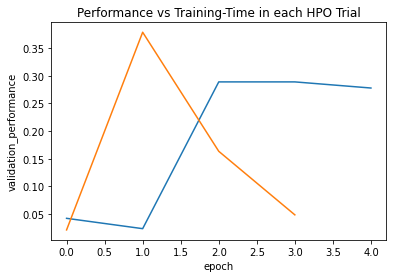

Finished, total runtime is 1857.91 s
{ 'best_config': { 'dataset': 'auto',
                   'dataset_root': 'auto',
                   'estimator': <class 'gluoncv.auto.estimators.ssd.ssd.SSDEstimator'>,
                   'gpus': [0],
                   'horovod': False,
                   'num_workers': 4,
                   'resume': '',
                   'save_interval': 1,
                   'ssd': { 'amp': False,
                            'base_network': 'resnet50_v1',
                            'data_shape': 512,
                            'filters': None,
                            'nms_thresh': 0.45,
                            'nms_topk': 400,
                            'ratios': ( [1, 2, 0.5],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.5, 3, 0.3333333333333333],
                                        [1, 2, 0.

In [18]:
time_limit =int(0.5*3600) # 4 hours

hyperparameters= { 
    'transfer': ag.Categorical('ssd_512_resnet50_v1_coco'),
                        'learning_rate': ag.Real(1e-4, 1e-2, log=True),
                        'batch_size': 4,
                        'epochs': 20,
                        'early_stop_patience': 2
                        }
hyperparameter_tune_kwargs =  {
                        'num_trials': 2,
                        'searcher': 'random',
                    }                       

detector = ObjectDetector()
detector.fit(dataset_train,
             hyperparameters=hyperparameters,
             time_limit=time_limit,
             hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

In [19]:
train_map = detector.evaluate(dataset_train)
print("mAP on train dataset: {}".format(train_map[1][1]))


test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][1]))

# visualization
result = detector.predict(dataset_test.iloc[0]['image'])
print('Prediction result:', result)

mAP on train dataset: 0.1767559927378838
mAP on test dataset: 0.3152193044672524


NumExpr defaulting to 4 threads.


Prediction result:    predict_class  ...                                       predict_rois
0              0  ...  {'xmin': 0.1870316118001938, 'ymin': 0.1576933...
1              0  ...  {'xmin': 0.04359254240989685, 'ymin': 0.046291...
2              0  ...  {'xmin': 0.6643085479736328, 'ymin': 0.1418263...
3              0  ...  {'xmin': 0.3882029950618744, 'ymin': 0.4138967...
4              0  ...  {'xmin': 0.3573307394981384, 'ymin': 0.5202187...
..           ...  ...                                                ...
84             0  ...  {'xmin': 0.8286942839622498, 'ymin': 0.3678349...
85             0  ...  {'xmin': 0.8000131845474243, 'ymin': 0.5465093...
86             0  ...  {'xmin': 0.9068222045898438, 'ymin': 0.3574798...
87             0  ...  {'xmin': 0.0, 'ymin': 0.17491768300533295, 'xm...
88             0  ...  {'xmin': 0.7148399353027344, 'ymin': 0.4555514...

[89 rows x 3 columns]


In [24]:
savefile = '/content/drive/MyDrive/GreatLearning/Captone_project/Code/Baala/model/detector_autog_v1.pkl'
detector.save(savefile)
new_detector = ObjectDetector.load(savefile)


# train_map = new_detector.evaluate(dataset_train)
# print("mAP on test dataset: {}".format(train_map[1][1]))


test_map = new_detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][1]))


result = new_detector.predict(dataset_test.iloc[0]['image'])
print('Prediction result:', result)



/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1591: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


mAP on test dataset: 0.3152193044672524
Prediction result:    predict_class  ...                                       predict_rois
0              0  ...  {'xmin': 0.1870316118001938, 'ymin': 0.1576933...
1              0  ...  {'xmin': 0.04359254240989685, 'ymin': 0.046291...
2              0  ...  {'xmin': 0.6643085479736328, 'ymin': 0.1418263...
3              0  ...  {'xmin': 0.3882029950618744, 'ymin': 0.4138967...
4              0  ...  {'xmin': 0.3573307394981384, 'ymin': 0.5202187...
..           ...  ...                                                ...
84             0  ...  {'xmin': 0.8286942839622498, 'ymin': 0.3678349...
85             0  ...  {'xmin': 0.8000131845474243, 'ymin': 0.5465093...
86             0  ...  {'xmin': 0.9068222045898438, 'ymin': 0.3574798...
87             0  ...  {'xmin': 0.0, 'ymin': 0.17491768300533295, 'xm...
88             0  ...  {'xmin': 0.7148399353027344, 'ymin': 0.4555514...

[89 rows x 3 columns]


In [ ]:
# imgcv = cv2.imread(dataset_train.iloc[0]["image"])

# cv2.rectangle(imgcv, (int(0.2403846153846154 * 416),
#                       int(0.6995192307692307*416)), 
#               (int(0.4110576923076923*416), int(0.7740384615384616*416)), (255,0,0), 2)

# cv2.rectangle(imgcv, (int(0.10230743885040283 * 416),
#                       int(0*416)), 
#               (int(0.8006809949874878*416), int(1*416)), (255,0,255), 2)
# plt.imshow(imgcv,"bone") 
# plt.show()
